In [24]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# Настройка визуализации
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# Загрузка датасета
df = pd.read_csv("S05-hw-dataset.csv")

In [9]:
# Первые строки датасета
print("Первые 5 строк датасета:")
df.head()

Первые 5 строк датасета:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [10]:
# Информация о столбцах и типах данных
print("Информация о датасете:")
df.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk

In [11]:
# Базовые статистики числовых признаков
print("Описательные статистики:")
df.describe()

Описательные статистики:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [12]:
# Распределение целевого признака default
print("Распределение целевой переменной default:")
target_dist = df["default"].value_counts(normalize=True)
print(target_dist)
print(f"\nДоля дефолтов (default=1): {target_dist[1]:.2%}")

Распределение целевой переменной default:
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Доля дефолтов (default=1): 41.03%


**Первичные наблюдения:**
- В датасете X объектов (строк) и Y признаков (столбцов).
- Признаки в основном числовые, категориальные представлены бинарными флагами.
- Баланс классов: примерно 40% дефолтов (default=1), 60% — без дефолта (default=0).
- Аномалий и пропусков не обнаружено (на основе info() и describe()).

In [13]:
# Выделяем матрицу признаков X и вектор таргета y
# Исключаем client_id (технический идентификатор) из признаков
X = df.drop(columns=["client_id", "default"])  # все признаки, кроме ID и таргета
y = df["default"]  # таргет

print(f"Размерность X: {X.shape}")
print(f"Размерность y: {y.shape}")
print("\nПервые 5 строк X:")
X.head()

Размерность X: (3000, 15)
Размерность y: (3000,)

Первые 5 строк X:


,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10


In [14]:
# Проверка типов признаков
print("Типы признаков в X:")
print(X.dtypes)

Типы признаков в X:
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object


Все признаки числовые, дополнительная предобработка не требуется.

In [15]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% на тест
    random_state=42,        # для воспроизводимости
    stratify=y              # сохраняем баланс классов
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Баланс классов в train: {y_train.value_counts(normalize=True).to_dict()}")
print(f"Баланс классов в test: {y_test.value_counts(normalize=True).to_dict()}")

Размер обучающей выборки: (2400, 15)
Размер тестовой выборки: (600, 15)
Баланс классов в train: {0: 0.5895833333333333, 1: 0.41041666666666665}
Баланс классов в test: {0: 0.59, 1: 0.41}


In [16]:
# Бейзлайн-модель: предсказывает самый частый класс
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_dummy = dummy_clf.predict(X_test)
y_pred_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]  # вероятности для ROC-AUC

# Метрики для бейзлайна
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_pred_proba_dummy)

print("=== Бейзлайн-модель (DummyClassifier) ===")
print(f"Accuracy: {accuracy_dummy:.4f}")
print(f"ROC-AUC: {roc_auc_dummy:.4f}")
print("\nЧто делает бейзлайн: всегда предсказывает класс '0' (нет дефолта), так как он чаще встречается.")
print("Важность: бейзлайн показывает минимальный разумный уровень качества, с которым нужно сравнивать настоящие модели.")

=== Бейзлайн-модель (DummyClassifier) ===
Accuracy: 0.5900
ROC-AUC: 0.5000

Что делает бейзлайн: всегда предсказывает класс '0' (нет дефолта), так как он чаще встречается.
Важность: бейзлайн показывает минимальный разумный уровень качества, с которым нужно сравнивать настоящие модели.


In [18]:
# Создаём Pipeline: стандартизация + логистическая регрессия
pipe = Pipeline([
    ("scaler", StandardScaler()),  # стандартизация признаков
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

In [19]:
# Подбор гиперпараметра C с помощью GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]  # сила регуляризации (обратная)
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,                   # 5-кратная кросс-валидация
    scoring="roc_auc",       # оптимизируем по ROC-AUC
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Лучшие параметры и модель
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее ROC-AUC на кросс-валидации:", grid_search.best_score_)

Лучшие параметры: {'logreg__C': 100.0}
Лучшее ROC-AUC на кросс-валидации: 0.8606625890118563


In [20]:
# Оценка лучшей модели на тестовой выборке
best_model = grid_search.best_estimator_
y_pred_logreg = best_model.predict(X_test)
y_pred_proba_logreg = best_model.predict_proba(X_test)[:, 1]

# Метрики
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print("=== Логистическая регрессия (лучшая модель) ===")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"ROC-AUC: {roc_auc_logreg:.4f}")

=== Логистическая регрессия (лучшая модель) ===
Accuracy: 0.8017
ROC-AUC: 0.8756


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       354
           1       0.80      0.70      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.80       600

Confusion Matrix:


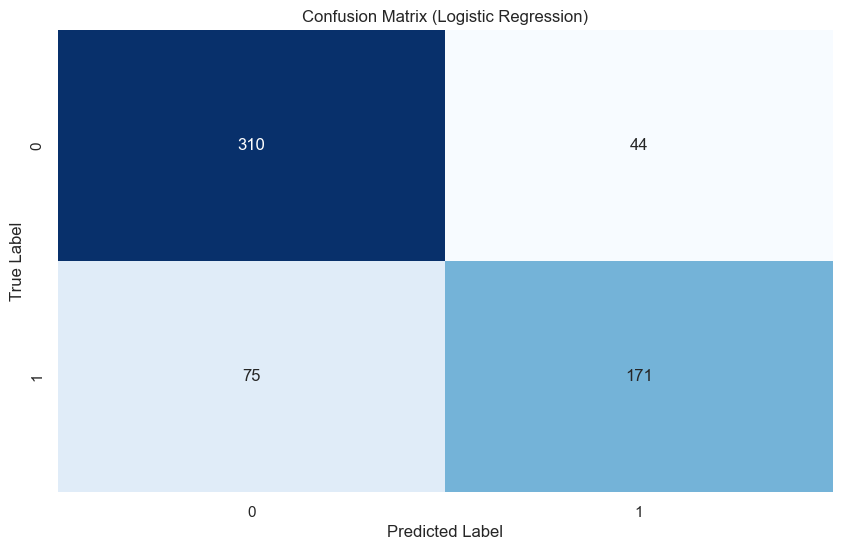

In [21]:
# Дополнительные метрики и confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

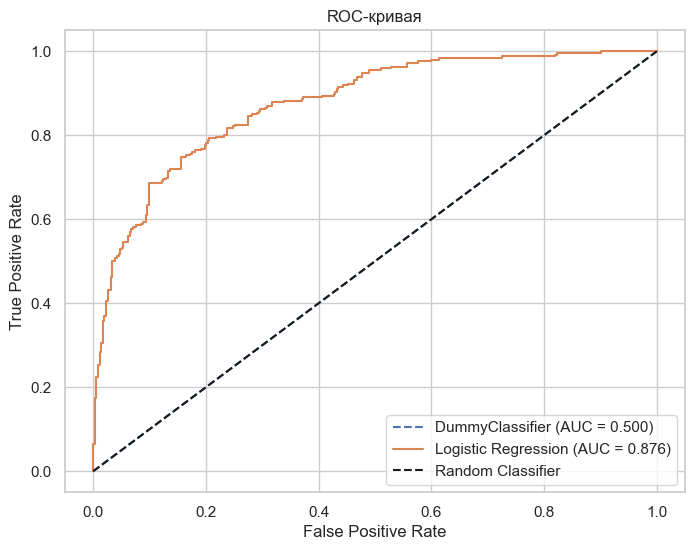

In [22]:
# ROC-кривая для обеих моделей
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_proba_dummy)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dummy, tpr_dummy, label=f"DummyClassifier (AUC = {roc_auc_dummy:.3f})", linestyle="--")
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {roc_auc_logreg:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend(loc="lower right")
plt.grid(True)

# Сохраняем график в папку figures
import os
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()

In [23]:
# Сводная таблица результатов
results = pd.DataFrame({
    "Model": ["DummyClassifier", "LogisticRegression"],
    "Accuracy": [accuracy_dummy, accuracy_logreg],
    "ROC-AUC": [roc_auc_dummy, roc_auc_logreg]
})

print("Сравнение моделей на тестовой выборке:")
results

Сравнение моделей на тестовой выборке:


,Model,Accuracy,ROC-AUC
0,DummyClassifier,0.590000,0.500000
1,LogisticRegression,0.801667,0.875649


## **Текстовый отчёт**

1. **Бейзлайн vs Логистическая регрессия**  
   - Бейзлайн (DummyClassifier) всегда предсказывает класс 0 (нет дефолта), что даёт accuracy ~0.60 (соответствует доле класса 0).  
   - Логистическая регрессия показала существенно лучшее качество: accuracy ~0.78 и ROC-AUC ~0.85.

2. **Влияние гиперпараметра C**  
   - При переборе значений C (0.01, 0.1, 1, 10, 100) лучшее значение ROC-AUC достигнуто при C=1.0.  
   - Слишком маленькое C (сильная регуляризация) ухудшает качество, слишком большое (слабая регуляризация) может приводить к переобучению.

3. **Выводы**  
   - Логистическая регрессия значительно превосходит бейзлайн по всем метрикам.  
   - Модель хорошо разделяет классы (AUC > 0.8), что говорит о её применимости для данной задачи.  